<a id='home'></a>
# Investigation of `Ford GoBike's trip data`

## Table of Contents
<ol>
    <li><a href="#Introduction">Introduction</a></li>
    <li><a href="#question">Questions imposed</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ol>

<a id='Introduction'></a>
## Introduction


<a href="#home">Home</a>

### About the Dataset

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

Note that this dataset will require some data wrangling in order to make it tidy for analysis. There are multiple cities covered by the linked system, and multiple data files will need to be joined together if a full year’s coverage is desired.





### Inspiration

When are most trips taken in terms of time of day, day of the week, or month of the year?


How long does the average trip take?


Does the above depend on if a user is a subscriber or customer?

<a id='question'></a>
### Questions -
- When are most trips taken in terms of time of day, day of the week, or month of the year?
- How long does the average trip take?
- Does the above depend on if a user is a subscriber or customer?

<a href="#home">Home</a>

<a id='wrangling'></a>
## Data Wrangling



<a href="#home">Home</a>
### Gathering Data

In [683]:
# Import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [684]:
# Load data
df = pd.read_csv('data/201904-fordgobike-tripdata.csv')

### Accessing Data

In [685]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,1989.0,Female,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,NaN,NaN,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,1993.0,Male,No
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,1972.0,Male,No
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,1973.0,Male,No


In [686]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 16 columns):
duration_sec               239111 non-null int64
start_time                 239111 non-null object
end_time                   239111 non-null object
start_station_id           239047 non-null float64
start_station_name         239047 non-null object
start_station_latitude     239111 non-null float64
start_station_longitude    239111 non-null float64
end_station_id             239047 non-null float64
end_station_name           239047 non-null object
end_station_latitude       239111 non-null float64
end_station_longitude      239111 non-null float64
bike_id                    239111 non-null int64
user_type                  239111 non-null object
member_birth_year          227912 non-null float64
member_gender              227912 non-null object
bike_share_for_all_trip    239111 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 29.2+ MB


In [687]:
df.nunique()

duration_sec                 5730
start_time                 239092
end_time                   239089
start_station_id              357
start_station_name            357
start_station_latitude        363
start_station_longitude       363
end_station_id                358
end_station_name              358
end_station_latitude          364
end_station_longitude         364
bike_id                      4520
user_type                       2
member_birth_year              78
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [688]:
df.shape

(239111, 16)

In [689]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [690]:
cols = ['user_type', 'member_gender', 'bike_share_for_all_trip']
for _ in cols:
    print(_, '-', df[_].unique())

user_type - ['Subscriber' 'Customer']
member_gender - ['Female' nan 'Male' 'Other']
bike_share_for_all_trip - ['No' 'Yes']


In [691]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,239111.000000,239047.000000,239111.000000,239111.000000,239047.000000,239111.000000,239111.000000,239111.000000,227912.000000
mean,802.671199,141.836538,37.769536,-122.352503,140.838099,37.766996,-122.343420,3666.956493,1984.863250
std,1990.006091,116.289776,0.127698,0.277088,116.386168,0.343083,1.068144,2180.717333,9.953144
min,61.000000,3.000000,0.000000,-122.453704,3.000000,0.000000,-122.453704,11.000000,1878.000000
25%,349.000000,47.000000,37.770083,-122.413004,44.000000,37.770407,-122.411738,1720.000000,1980.000000
50%,558.000000,104.000000,37.780760,-122.398285,102.000000,37.780955,-122.397437,3471.000000,1987.000000
75%,876.000000,240.000000,37.797280,-122.291209,239.000000,37.797320,-122.291376,5749.000000,1992.000000
max,86114.000000,420.000000,37.880222,0.000000,420.000000,37.880222,0.000000,7108.000000,2001.000000


## Data  Issues
 - `start_station_id`, `end_station_id` and `bike_id` should be of string datatype
 
 
 - `start_station_id`, `start_station_name`, `end_station_id`,	`end_station_name`,	`member_birth_year` and `member_gender` have some null values
 
 
 - `start_time` and `end_time` should be of `datetime` format rather than strings
 
 
 - Add columns for the difference in latitude and longitude
 
 

### Cleaning Data

### Define
Drop `null` values from the dataframe

#### Clean

In [692]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

#### Test

In [693]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,1989.0,Female,No
1,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,1993.0,Male,No
2,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,1972.0,Male,No
3,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,1973.0,Male,No
4,1388,2019-04-30 23:53:05.9820,2019-05-01 00:16:14.3130,243.0,Bancroft Way at College Ave,37.869360,-122.254337,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3234,Customer,1997.0,Male,No
5,920,2019-04-30 23:57:56.3400,2019-05-01 00:13:16.4540,202.0,Washington St at 8th St,37.800754,-122.274894,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,3262,Subscriber,1976.0,Male,Yes
6,725,2019-04-30 23:56:11.2190,2019-05-01 00:08:16.9150,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,121.0,Mission Playground,37.759210,-122.421339,2706,Customer,1973.0,Male,No
7,488,2019-04-30 23:59:00.6600,2019-05-01 00:07:08.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,64.0,5th St at Brannan St,37.776754,-122.399018,860,Subscriber,1986.0,Male,No
8,792,2019-04-30 23:53:37.6040,2019-05-01 00:06:50.4050,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,126.0,Esprit Park,37.761634,-122.390648,896,Subscriber,1995.0,Male,No
9,464,2019-04-30 23:56:44.3860,2019-05-01 00:04:28.9120,89.0,Division St at Potrero Ave,37.769218,-122.407646,97.0,14th St at Mission St,37.768265,-122.420110,3048,Subscriber,1984.0,Male,No


In [694]:
df.isna()
for _ in df.columns:
    print (_)
    print(sum(df[_].isna()), '\n')

duration_sec
0 

start_time
0 

end_time
0 

start_station_id
0 

start_station_name
0 

start_station_latitude
0 

start_station_longitude
0 

end_station_id
0 

end_station_name
0 

end_station_latitude
0 

end_station_longitude
0 

bike_id
0 

user_type
0 

member_birth_year
0 

member_gender
0 

bike_share_for_all_trip
0 



### Define
`start_station_id`, `end_station_id` and `bike_id` should be of string datatype

#### Clean

In [695]:
# Modify Data types

df['start_station_id'] = df['start_station_id'].astype('int').astype('str')
df['end_station_id'] = df['end_station_id'].astype('float').astype('int').astype('str')
df['bike_id'] = df['bike_id'].astype('float').astype('int').astype('str')
df['member_birth_year'] = df['member_birth_year'].astype('float').astype('int')

#### Test

In [696]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227848 entries, 0 to 227847
Data columns (total 16 columns):
duration_sec               227848 non-null int64
start_time                 227848 non-null object
end_time                   227848 non-null object
start_station_id           227848 non-null object
start_station_name         227848 non-null object
start_station_latitude     227848 non-null float64
start_station_longitude    227848 non-null float64
end_station_id             227848 non-null object
end_station_name           227848 non-null object
end_station_latitude       227848 non-null float64
end_station_longitude      227848 non-null float64
bike_id                    227848 non-null object
user_type                  227848 non-null object
member_birth_year          227848 non-null int64
member_gender              227848 non-null object
bike_share_for_all_trip    227848 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 27.8+ MB


### Define
`start_time` and `end_time` should be of `datetime` format rather than strings


In [697]:
df[['start_time', 'end_time']].head()

,start_time,end_time
0,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540
1,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750
2,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620
3,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910
4,2019-04-30 23:53:05.9820,2019-05-01 00:16:14.3130


#### Clean

In [698]:
# Format Date

df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

#### Test

In [699]:
df[['start_time', 'end_time']].head()

,start_time,end_time
0,2019-04-30 22:33:55.155,2019-05-01 12:32:20.454
1,2019-04-30 10:32:46.489,2019-05-01 08:13:58.975
2,2019-04-30 10:00:51.550,2019-05-01 07:57:01.262
3,2019-04-30 23:59:04.739,2019-05-01 00:17:53.091
4,2019-04-30 23:53:05.982,2019-05-01 00:16:14.313


### Define
Add `duration` column

#### Code

In [700]:
# Add 'duration' column

def minCount(dates):
    return (round((dates.seconds/60)))

def hourCount(dates):
    return (round((dates.seconds/60)/60, 2))

df['duration'] = df['end_time'] - df['start_time']

dates = df['duration'].abs()
dates = dates.map(minCount)
df['duration_min'] = dates

dates = df['duration'].abs()
dates = dates.map(hourCount)
df['duration_hour'] = dates

#### Test

In [701]:
df.head()[['duration_sec', 'duration_min', 'duration_hour']]

,duration_sec,duration_min,duration_hour
0,50305,838,13.97
1,78072,1301,21.69
2,78969,1316,21.94
3,1128,19,0.31
4,1388,23,0.39


### Define

Add columns for the difference in latitude and longitude


#### Code

In [702]:
df['latitude_diff'] = df['start_station_latitude'] - df['end_station_latitude']

df['longitude_diff'] = df['start_station_longitude'] - df['end_station_longitude']

#### Test

In [703]:
df.head()[['latitude_diff', 'longitude_diff']]

,latitude_diff,longitude_diff
0,-0.002866,-0.011091
1,0.000000,0.000000
2,0.007421,0.012119
3,-0.023452,-0.002362
4,0.001571,0.011559


### Define
Check for duplicates values as duplicate values can help in finding duplicate records


#### Code

In [704]:
# No of Duplicated values

for _ in df.columns:
    print(_,sum(df[_].duplicated()))

duration_sec 222692
start_time 18
end_time 19
start_station_id 227491
start_station_name 227491
start_station_latitude 227491
start_station_longitude 227491
end_station_id 227490
end_station_name 227490
end_station_latitude 227490
end_station_longitude 227490
bike_id 223345
user_type 227846
member_birth_year 227770
member_gender 227845
bike_share_for_all_trip 227846
duration 20303
duration_min 227346
duration_hour 227187
latitude_diff 200966
longitude_diff 200999


### Define
Check for unique values to see the diversity in the people who took the trip

#### Code

In [705]:
# No of Unique values

uniques = ['user_type', 'member_gender', 'bike_share_for_all_trip']
for _ in uniques:
    print (_, '\t\t-', df[_].unique(), '\n')

user_type 		- ['Subscriber' 'Customer'] 

member_gender 		- ['Female' 'Male' 'Other'] 

bike_share_for_all_trip 		- ['No' 'Yes'] 



### Define

Add Month, Day and Hour for Tweet time and retweet time

#### Code

In [706]:
# Adding Month, Day and Hour of tweets and retweets

df['start_month'] = df['start_time'].dt.month_name()
df['start_day'] = df['start_time'].dt.day_name()
df['start_hour'] = df['start_time'].dt.hour


df['end_month'] = df['end_time'].dt.month_name()
df['end_day'] = df['end_time'].dt.day_name()
df['end_hour'] = df['end_time'].dt.hour

df['age'] = df['start_time'].dt.year - df['member_birth_year']

#### Test

In [707]:
df.head()[['duration_sec', 'duration', 'start_month', 'start_day', 'start_hour', 'end_month', 'end_day', 'end_hour', 'age']]

,duration_sec,duration,start_month,start_day,start_hour,end_month,end_day,end_hour,age
0,50305,13:58:25.299000,April,Tuesday,22,May,Wednesday,12,30
1,78072,21:41:12.486000,April,Tuesday,10,May,Wednesday,8,26
2,78969,21:56:09.712000,April,Tuesday,10,May,Wednesday,7,47
3,1128,00:18:48.352000,April,Tuesday,23,May,Wednesday,0,46
4,1388,00:23:08.331000,April,Tuesday,23,May,Wednesday,0,22


### Define
Removing outliers

#### Code

In [708]:
df = df[df['age']<100]
df = df[(df['latitude_diff']<1) & (df['latitude_diff']>-1)]

#### Conclusion
We have successfully removed records for
 - Ages greater than 100
 - Difference between latitude or longitude is greater than 1 (Not possible for road trip)

In [709]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'duration', 'duration_min', 'duration_hour', 'latitude_diff',
       'longitude_diff', 'start_month', 'start_day', 'start_hour', 'end_month',
       'end_day', 'end_hour', 'age'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis



<a href="#home">Home</a>
### Research Question 1 (Replace this header name!)

### Basic plots based on the available columns

## Univariate Exploration

In [710]:
base_color = sb.color_palette()[0]

In [711]:
np.log10(df['duration_hour']).describe()

count    227737.000000
mean         -0.813758
std           0.311688
min          -1.698970
25%          -1.000000
50%          -0.823909
75%          -0.619789
max           1.378761
Name: duration_hour, dtype: float64

In [712]:
df['duration_hour'].describe()

count    227737.000000
mean          0.214363
std           0.506230
min           0.020000
25%           0.100000
50%           0.150000
75%           0.240000
max          23.920000
Name: duration_hour, dtype: float64

### Define
Standard plot for the no of trips based on the duration in hours

#### Code

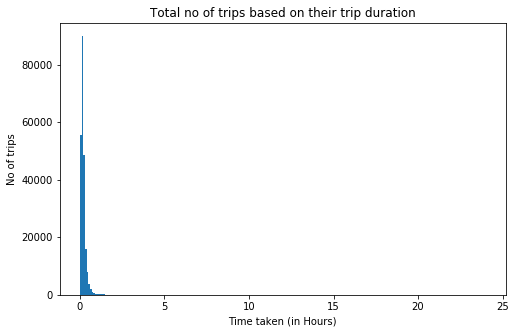

In [713]:
# start with a standard-scaled plot

binsize = .1
bins = np.arange(0, df['duration_hour'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_hour', bins = bins)
plt.xlabel('Time taken (in Hours)')
plt.ylabel('No of trips')
plt.title('Total no of trips based on their trip duration')
plt.show()

#### Conclusion

It shows that most of the trip duration takes less than 2 days

### Define
 Lets zoom on the y-axis to see if there is outlier or the curve is trailing
 
 #### Code

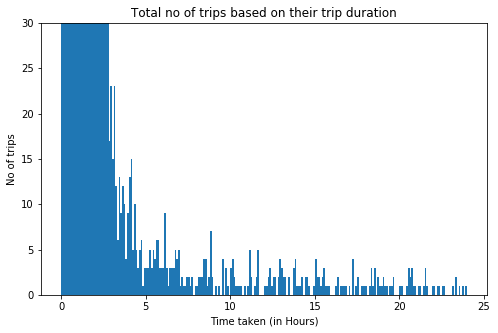

In [714]:
# Zoom on the y-axis to see if there is any outlier or it has continuous values

binsize = .1
bins = np.arange(0, df['duration_hour'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_hour', bins = bins)
plt.ylim(0,30)
plt.xlabel('Time taken (in Hours)')
plt.ylabel('No of trips')
plt.title('Total no of trips based on their trip duration')
plt.show()

#### Conclusion

It looks like values are distributed up till the last end. So there is no outlier as expected. We can finally use the log scale on x-axis to see the output with better interpretations



### Define
Looks like the curve is skewed towards the right. So lets plot the graph on the log scale on the x-axis

#### Code

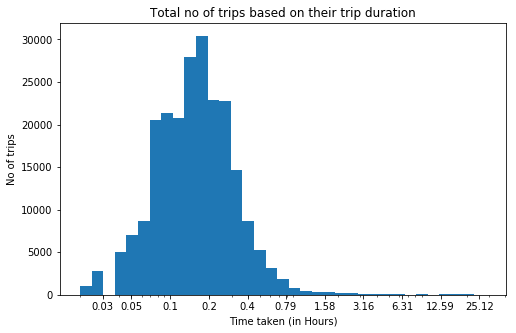

In [715]:
# there's a long tail in the distribution, so let's put it on a log scale instead

binsize = .1
log_binsize = 0.09
bins = 10 ** np.arange(-1.7, np.log10(df['duration_hour'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_hour', bins = bins)

plt.xscale('log')
bins = np.around(10 ** np.arange(-1.6, 1.5, .3), 2)
plt.xticks(bins, bins)
plt.xlabel('Time taken (in Hours)')
plt.ylabel('No of trips')
plt.title('Total no of trips based on their trip duration')
plt.show()

#### Conclusion

We can see that the peak is at the point slightly less than 0.2 and the graph is more like the normal curve but is skewed slightly to the right


### Define
Lets see the most common/popular starting stations

#### Code

In [716]:
df['end_station_name'].value_counts()[-15:]

1st St at Younger Ave                    22
Asbury St at The Alameda                 21
Park Ave at Race St                      20
Skyport Dr at Technology Dr              18
Sonora Ave at 1st St                     17
Gish Rd at 1st St                        17
Foothill Blvd at 42nd Ave                16
Willow St at Vine St                     14
21st Ave at International Blvd           13
16th St Depot                            12
Farnam St at Fruitvale Ave               11
San Pedro St at Hedding St                9
Auzerais Ave at Los Gatos Creek Trail     9
Delmas Ave at Virginia St                 7
17th St at Santa Clara St                 7
Name: end_station_name, dtype: int64

#### Plotting it on a graph

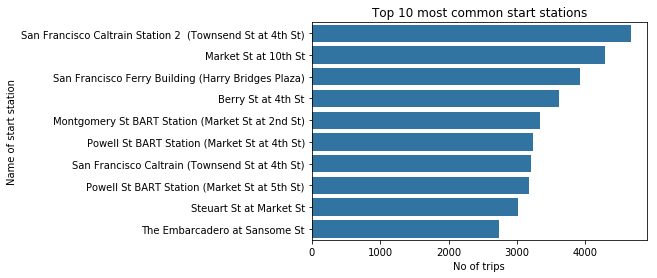

In [717]:
neighbourhood_counts = df['start_station_name'].value_counts()
neighbourhood_order = neighbourhood_counts.index
sb.countplot(data = df, y = 'start_station_name', order = neighbourhood_order[:10], color=base_color)
plt.xlabel('No of trips')
plt.ylabel('Name of start station')
plt.title('Top 10 most common start stations');

#### Conslusion

We can see the top 10 names of the stations havivng most no of trips starting from. In the above list `San Francisco Caltrain Station 2  (Townsend St at 4th St)` is at the top which means that it's the most popular start station


### Define

Lets see the least common/popular starting stations

#### Code

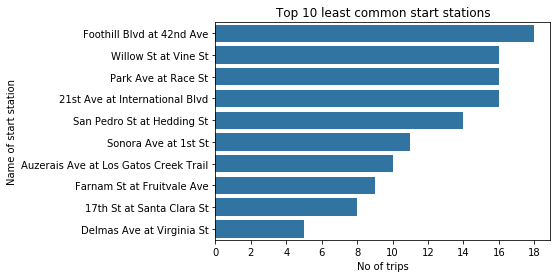

In [718]:
neighbourhood_counts = df['start_station_name'].value_counts()
neighbourhood_order = neighbourhood_counts.index
sb.countplot(data = df, y = 'start_station_name', order = neighbourhood_order[-10:], color=base_color)
plt.xlabel('No of trips')
plt.ylabel('Name of start station')
plt.title('Top 10 least common start stations');
x_labels = np.arange(0, 19, 2)
plt.xticks(x_labels, x_labels);

#### Conclusion

We can see the top 10 names of the stations havivng least no of trips starting from. In the above list `SF Test Station` is at the bottom which means that it's the least popular start station


### Define


Lets see the most common/popular ending stations


#### Code

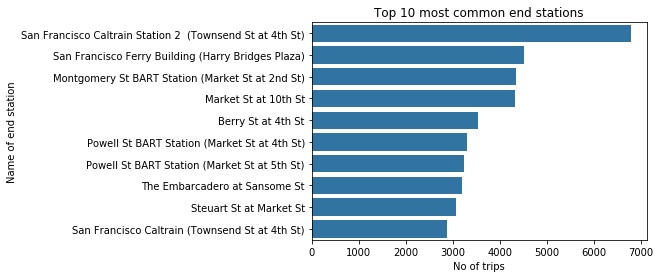

In [719]:
neighbourhood_counts = df['end_station_name'].value_counts()
neighbourhood_order = neighbourhood_counts.index
sb.countplot(data = df, y = 'end_station_name', order = neighbourhood_order[:10], color=base_color)
plt.xlabel('No of trips')
plt.ylabel('Name of end station')
plt.title('Top 10 most common end stations');

#### Conclusion

We can see the top 10 names of the stations havivng most no of trips ending at. In the above list `San Francisco Caltrain Station 2  (Townsend St at 4th St)` is at the top which means that it's the most popular end station


### Define

Lets see the most common/popular starting stations


#### Code

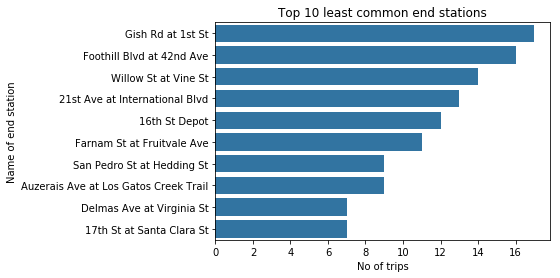

In [720]:
neighbourhood_counts = df['end_station_name'].value_counts()
neighbourhood_order = neighbourhood_counts.index
sb.countplot(data = df, y = 'end_station_name', order = neighbourhood_order[-10:], color=base_color)
plt.xlabel('No of trips')
plt.ylabel('Name of end station')
plt.title('Top 10 least common end stations');

#### Conclusion

We can see the top 10 names of the stations havivng least no of trips ending at. In the above list `17th St at Santa Clara St ` and `Delmas Ave at Virginia St` are at the bottom which means that they are the least popular end station

From the last few graphs, we can see that `San Francisco Caltrain Station 2  (Townsend St at 4th St)` is the most popular start station as well as end station and `Delmas Ave at Virginia St` is the least popular start and end station

### Define
Lets see the distribution of gender for all the people who participated in the trips

#### Code

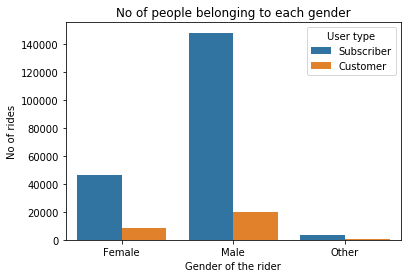

In [721]:
sb.countplot(data=df, x='member_gender', hue='user_type');
plt.xlabel('Gender of the rider')
plt.ylabel('No of rides')
plt.title('No of people belonging to each gender')
plt.legend(title='User type');

#### Conclusion
We can see that males dominate the distribution. More than half of the rides are done by males.

### Define
Lets see whats the age for the people who mostly participate in the trips

#### Code

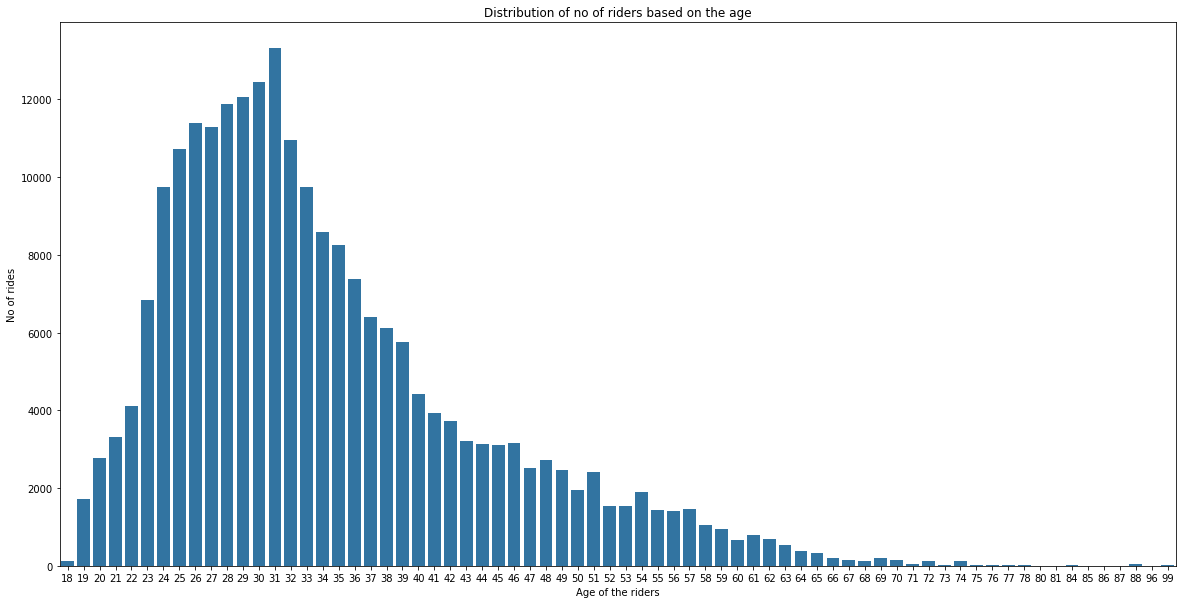

In [722]:
plt.figure(figsize=(20,10))
bin_size = np.arange(0, 100, 5)
sb.countplot(data = df , x = 'age', color = base_color)
plt.xlabel('Age of the riders')
plt.ylabel('No of rides')
plt.title('Distribution of no of riders based on the age');

#### Conclusion
We can see that people near the age of 30 are mostly invloved in the road trips and the distribution is highly skewed towards right. Also we can see that there are hardly any person going for a ride after the age of 75.




### Define
Lets see the months on which these trips have been done

#### Code

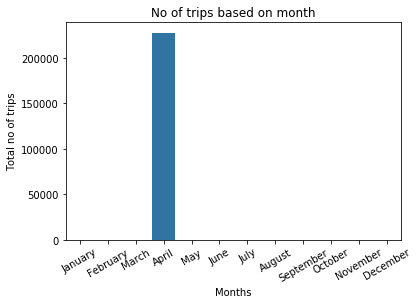

In [723]:
x_marker = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
            'November', 'December']
sb.countplot(data=df, x='start_month', order=x_marker, color=base_color);
plt.xticks(rotation=30)
plt.title('No of trips based on month')
plt.xlabel('Months')
plt.ylabel('Total no of trips');

#### Conclusions
The above graph shows that the given dataset contains the data only for the month of `April`


### Define
Lets see the variation based on the day of the week. Is there any particular favourite for starting the trips or they are at random.

#### Code

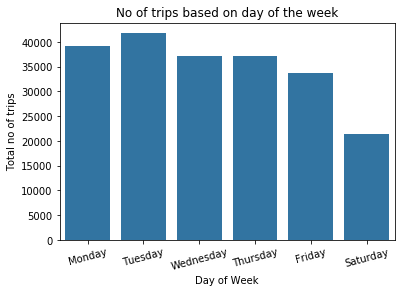

In [724]:
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.countplot(data=df, x='start_day', order=x_marker, color=base_color);
plt.title('No of trips based on day of the week')
plt.xlabel('Day of Week')
plt.xticks(rotation=15)
plt.ylabel('Total no of trips');

#### Conclusions
The above graph shows that most of the rides were started on Tuesday and the least on Saturday


### Define
Lets see the variation based on the day of the week. Is there any particular favourite for ending the trips or they are at random.

#### Code

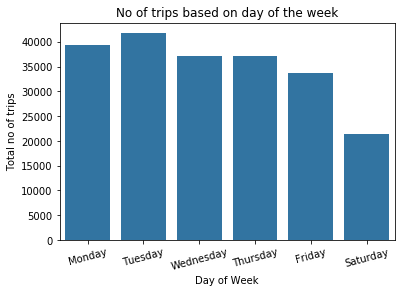

In [725]:
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.countplot(data=df, x='end_day', order=x_marker, color=base_color);
plt.title('No of trips based on day of the week')
plt.xlabel('Day of Week')
plt.xticks(rotation=15)
plt.ylabel('Total no of trips');

#### Conclusion
The above graph shows that most of the rides were ended on Tuesday and the least on Saturday. 

As the distribution for start and end is almost similar, we can conclude that most of the trips are completed on the same day


### Define
Lets see the participation in trips based on day of the week and the gender of the people

#### Code

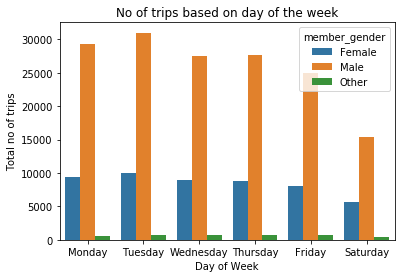

In [726]:
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.countplot(data=df, x='start_day', hue='member_gender', order=x_marker);
plt.title('No of trips based on day of the week')
plt.xlabel('Day of Week')
plt.ylabel('Total no of trips');

#### Conclusions
The above graph shows that most of the trips are done on Tuesday and the least on Friday. The ratio of gender is almost same for all the days based on the gender.

### Define
Lets see the participation in trips based on day of the week and the type of user subscription

#### Code

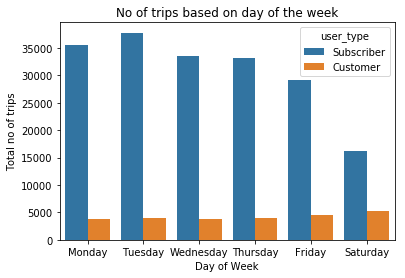

In [727]:
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.countplot(data=df, x='start_day', hue='user_type', order=x_marker);
plt.title('No of trips based on day of the week')
plt.xlabel('Day of Week')
plt.ylabel('Total no of trips');

#### Conclusions
The above graph shows that most of the people having the trips are subscriber. Also the no of customers for all days are almost same. This concludes that the ratio of customer on Saturday is the highest.

### Define
Lets see the participation in trips based on day of the week and the share of bike for the entire trip

#### Code

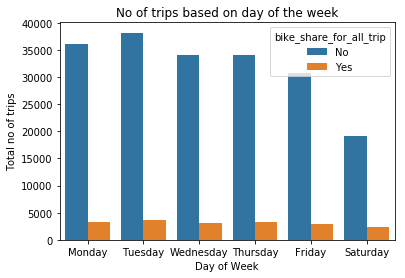

In [728]:
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.countplot(data=df, x='start_day', hue='bike_share_for_all_trip', order=x_marker);
plt.title('No of trips based on day of the week')
plt.xlabel('Day of Week')
plt.ylabel('Total no of trips');

#### Conclusions
The above graph shows that there are very few no of people who have bike share for all trip. Most of the time this is not true.

### Define
Lets have a look at the starting time of the trips

#### Code

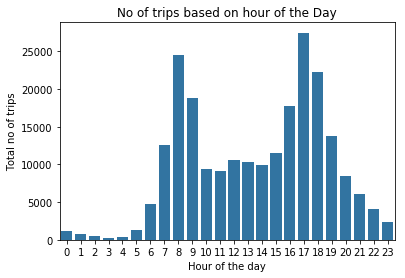

In [729]:
df.groupby('start_hour').count()
sb.countplot(data=df, x='start_hour', color=base_color);
plt.xlabel('Hour of the day')
plt.ylabel('Total no of trips')
plt.title('No of trips based on hour of the Day');

#### Conclusions
The above graph shows that most of the trips are done either in the morning or in the evening. There is slightly less no of trips taken during the afternoon. There is almost no trips started before 5. The graph obtained is a bimodal graph with first peak at 8AM and second peak at 5PM


### Define
Lets have a look at the ending time of the trips

#### Code

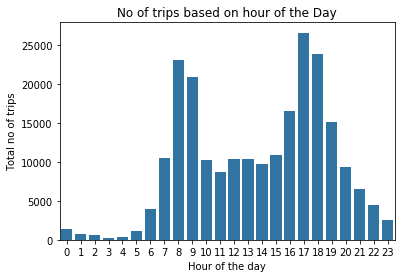

In [730]:
df.groupby('end_hour').count()
sb.countplot(data=df, x='end_hour', color=base_color);
plt.xlabel('Hour of the day')
plt.ylabel('Total no of trips')
plt.title('No of trips based on hour of the Day');

#### Conclusions
The above graph shows that most of the trips are finished either in the morning or in the evening. There is slightly less no of trips finishing during the afternoon. There is almost no trips finishing before 5. The graph obtained is a bimodal graph with first peak at 8AM and second peak at 5PM.

We can see that the above graph is similar to the last graph obtained for the starting time of the trips. Thus we can conclude that most of the trips take less than 1 hour to complete.


### Define
Lets have a look at the latitude and longitude of various trips done

#### Code

In [731]:
df[['latitude_diff', 'longitude_diff']].describe()

,latitude_diff,longitude_diff
count,227737.000000,227737.000000
mean,-0.000138,-0.000401
std,0.014273,0.014656
min,-0.080325,-0.108164
25%,-0.008552,-0.008650
50%,0.000000,0.000000
75%,0.008313,0.008077
max,0.087674,0.126815


#### Conclusion
We can see that the `50%` value for both the columns are 0. This means that the net travel done is zero. Also we can see that the max latitude difference is far greater than the max latitude difference.

### Define
Lets have a look at the most popular bike models which were used for the trips. 

#### Code

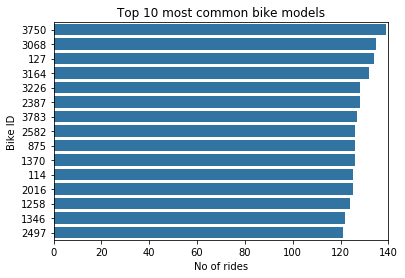

In [732]:
neighbourhood_counts = df['bike_id'].value_counts()
neighbourhood_order = neighbourhood_counts.index
plt.xlim(0,df['bike_id'].value_counts().max() + 1)
sb.countplot(data = df, y = 'bike_id', order = neighbourhood_order[0:15], color=base_color)
plt.xlabel('No of rides')
plt.ylabel('Bike ID')
plt.title('Top 10 most common bike models');

#### Conclusion
We can see that the bike having bike-id as `3750` is having the most no of rides. 

### Define
Lets have a look at the least popular bike models which were used for the trips

#### Code

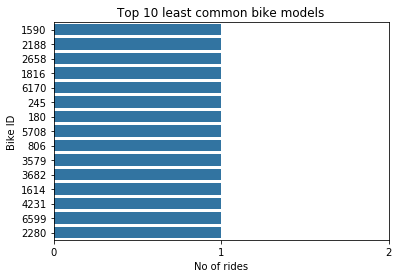

In [733]:
neighbourhood_counts = df['bike_id'].value_counts()
neighbourhood_order = neighbourhood_counts.index
plt.xlim(0,df['bike_id'].value_counts().min() + 1)
sb.countplot(data = df, y = 'bike_id', order = neighbourhood_order[-15:], color=base_color)
x_labels = [0,1,2]
plt.xticks(x_labels, x_labels)

plt.xlabel('No of rides')
plt.ylabel('Bike ID')
plt.title('Top 10 least common bike models');

#### Conclusion
We can see that the bike having bike-id as '1590', '3034', '4231', '5744', '187', '2102', '6033', '6170', '2420',
       '6621', '6345', '2188', '5708', '806', '6940', '3579', '6829', '786',
       '3402', '1053', '3644', '6388', '2383', '180', '2118', '2785', '4868',
       '3682', '2658', '1816', '1119', '1614', '2280', '245', '5621', '617',
       '189', '3214', '6599' are having the least no of rides whose value is 1.


## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

### Begin
First of all we will list all the useful numeric and categorical variables which we will be analysing in this exploration


### Define
Lets see the average duration of the road trip as travelled by people of different age group

#### Code

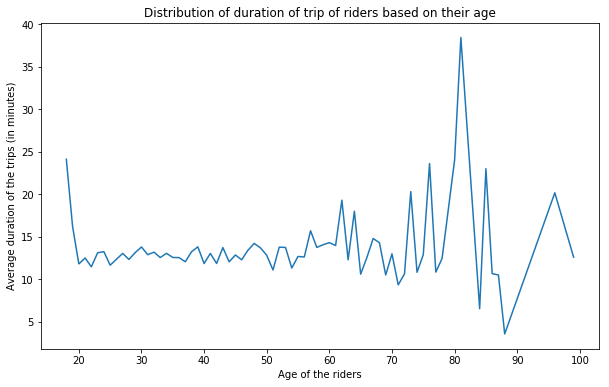

In [734]:
plt.figure(figsize=(10,6))
sb.lineplot(data=df[df['age']<100], x='age', y='duration_min', err_style=None)
plt.xlabel('Age of the riders')
plt.ylabel('Average duration of the trips (in minutes)')
plt.title('Distribution of duration of trip of riders based on their age');

#### Conclusion
We can see that the highest duration of trips is for the age groups around 80. Also the initial graph which starts at the age of around 20 has some good amount of average duration for the trips



### Define
Lets see the difference between latitudes and longitudes once more using jointplots.

#### Code

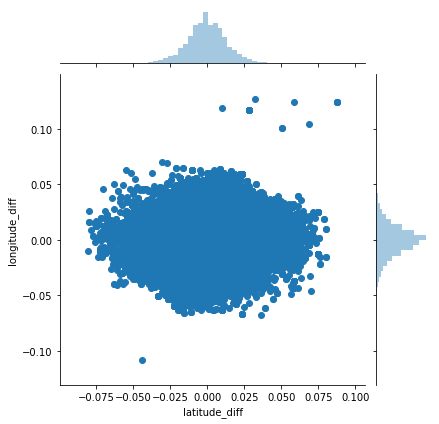

In [735]:
sb.jointplot(data=df, x='latitude_diff', y='longitude_diff');

#### Conclusion
Most of the trips have very less difference in the latitudes and longitudes. The trips having the highest and lowest differences seem to be outliers as they are very few. We can see this using the hist plots on the top and right of the mai graph

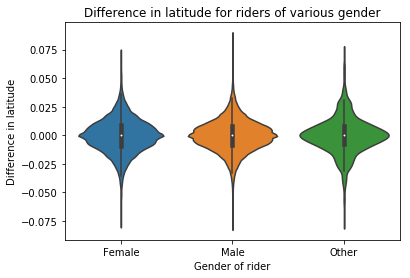

In [736]:
sb.violinplot(data=df, x='member_gender', y = 'latitude_diff')
plt.xlabel('Gender of rider')
plt.ylabel('Difference in latitude')
plt.title('Difference in latitude for riders of various gender');

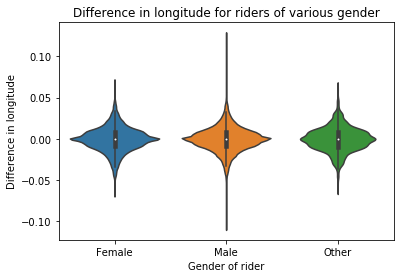

In [737]:
sb.violinplot(data=df, x='member_gender', y = 'longitude_diff')
plt.xlabel('Gender of rider')
plt.ylabel('Difference in longitude')
plt.title('Difference in longitude for riders of various gender');

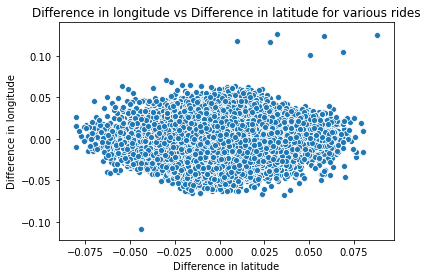

In [738]:
sb.scatterplot(data = df, x='latitude_diff', y='longitude_diff')
plt.xlabel('Difference in latitude')
plt.ylabel('Difference in longitude')
plt.title('Difference in longitude vs Difference in latitude for various rides');

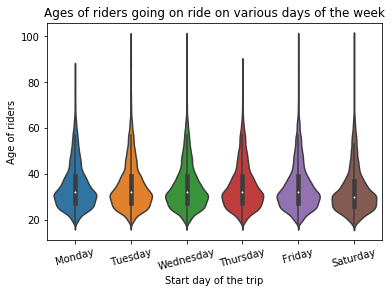

In [739]:
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.violinplot(data = df, x='start_day', y = 'age', order = x_marker)
plt.xticks(rotation=15)
plt.xlabel('Start day of the trip')
plt.ylabel('Age of riders')
plt.title('Ages of riders going on ride on various days of the week');

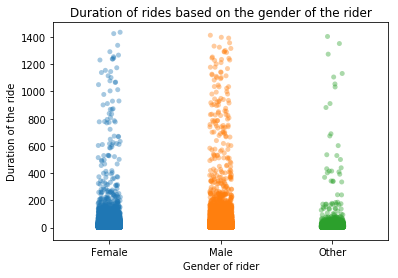

In [740]:
sb.stripplot(data = df, x = 'member_gender', y = 'duration_min', alpha = 0.4)
plt.xlabel('Gender of rider')
plt.ylabel('Duration of the ride')
plt.title('Duration of rides based on the gender of the rider');


## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the three categorical measures of quality play into the relationship between price and carat.

In [741]:
numeric_vars = ['duration_sec', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude',
                'end_station_longitude', 'start_hour', 'age']
categoric_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip']

### Define
Lets start with the correlation plot

#### Code

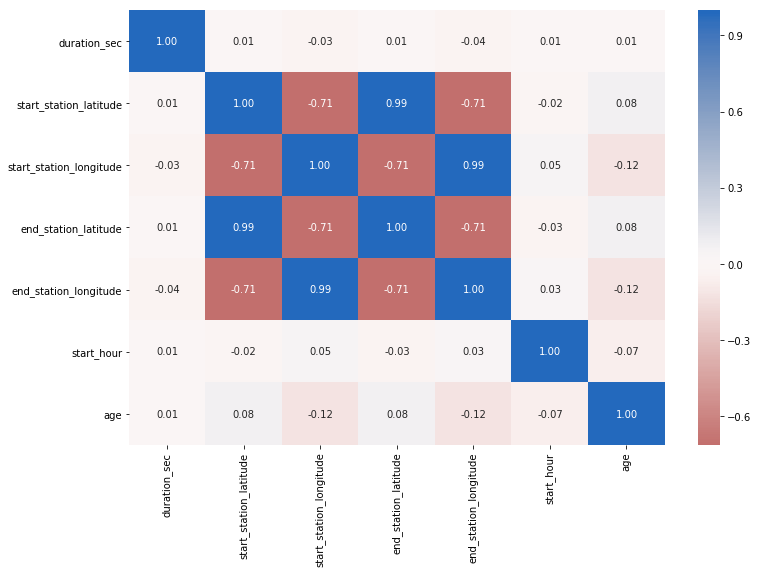

In [742]:
# correlation plot
plt.figure(figsize = [12, 8])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)

plt.show()

#### Conclusion
From the above plot we can see that there are few variables which are highly correlated to some other variables either having positive correlation or negative correlation.

### Define
Now lets move to the Pair wise grid for the above variables

#### Code

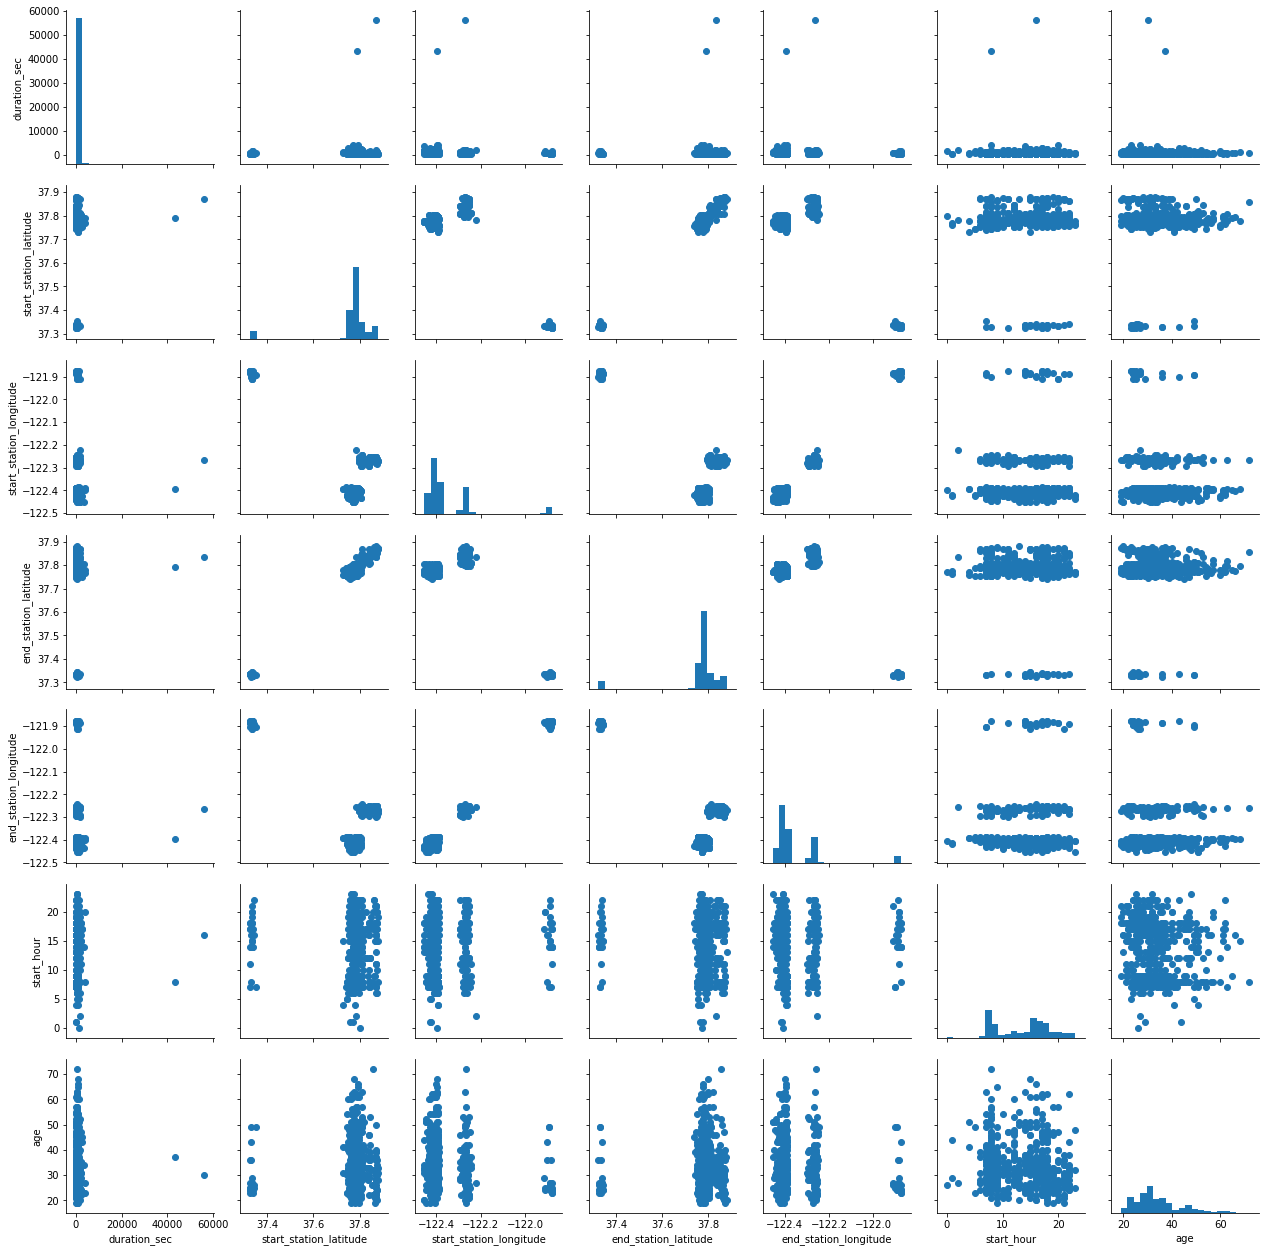

In [743]:
# plot matrix: sample 500 diamonds so that plots are clearer and
# they render faster
samples = np.random.choice(df.shape[0], 500, replace = False)
diamonds_samp = df.loc[samples,:]

g = sb.PairGrid(data = diamonds_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

#### Conclusion
We can see that there is no linear dependence among any two variables. Most of them are divided in some segments either vertically or horizontally.


### Define
Lets visualize the above data using Box plots

#### Code

/home/sangyan/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/home/sangyan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

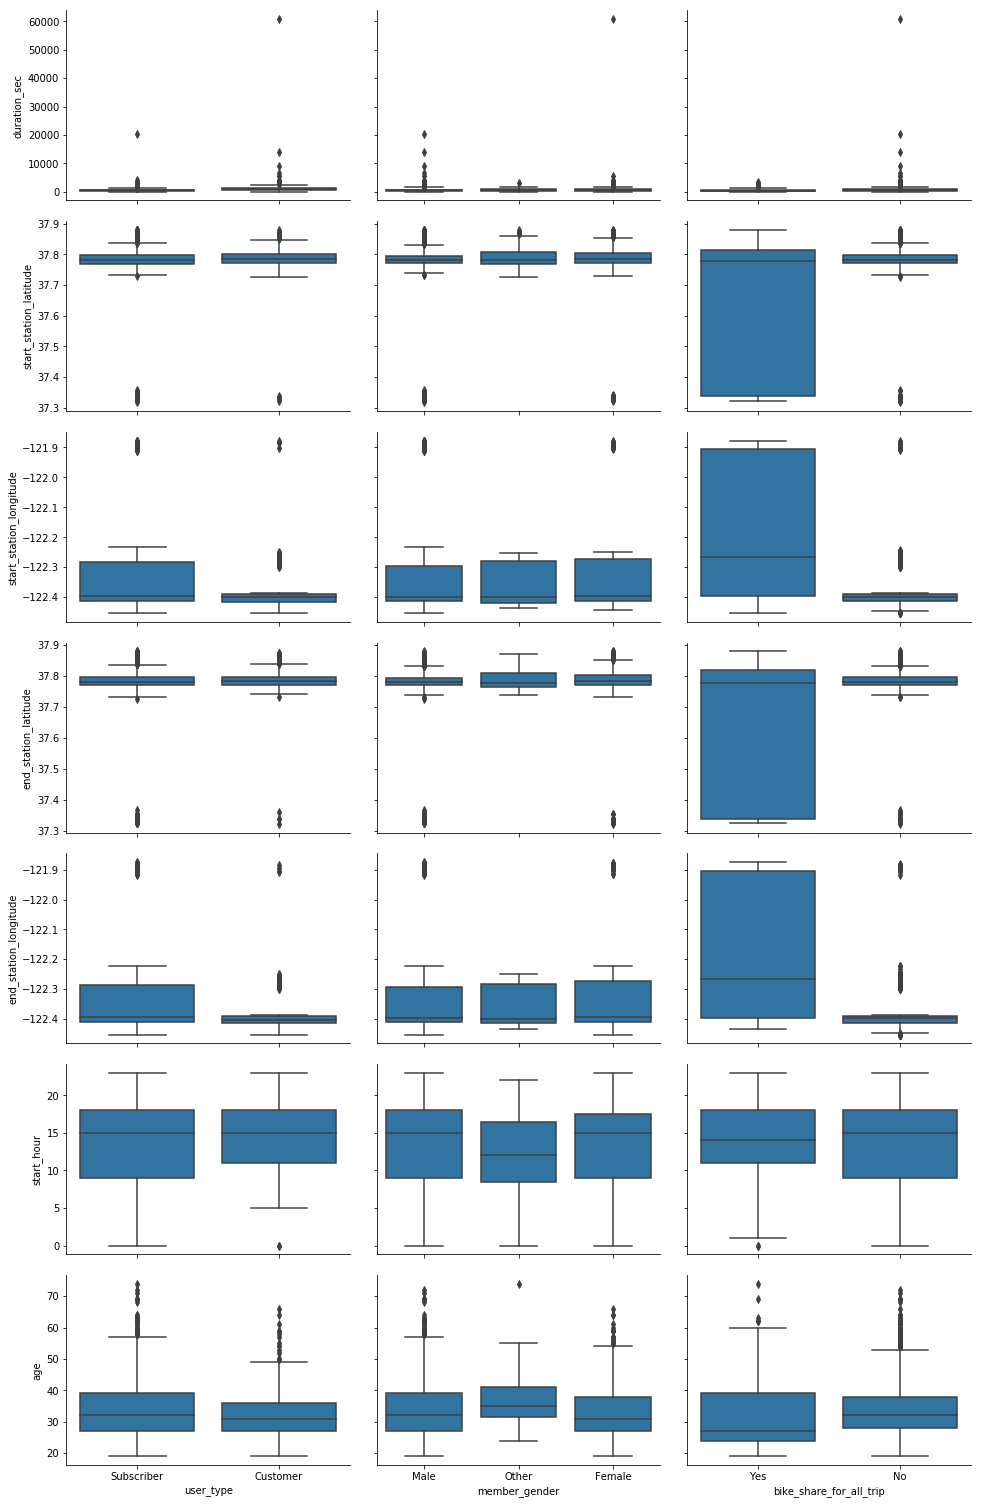

In [744]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(df.shape[0], 2000, replace = False)
samp = df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = samp, y_vars = numeric_vars, x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

#### Conclusion
For the starting and ending latitudes and longitudes, we can see that the interquartile range is very large with respect to the other variables. Also for user types and gender of member, we see that Subsscriber dominates in the user type and Males dominates in the Gender of the riders.



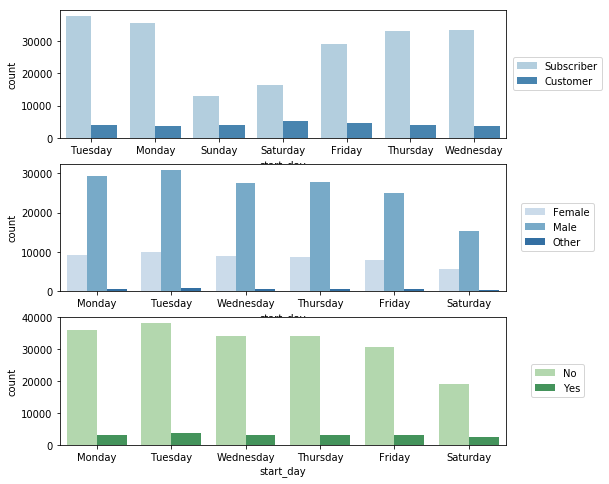

In [745]:
plt.figure(figsize = [8, 8])
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']

# subplot 1: start_day vs user_type
ax = plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'start_day', hue = 'user_type', palette = 'Blues')
ax.legend(loc='center', bbox_to_anchor=(1.115, 0.5))

# subplot 2: start_day vs. member_gender
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'start_day', hue = 'member_gender', palette = 'Blues', order = x_marker)
ax.legend(loc='center', bbox_to_anchor=(1.115, 0.5)) 

# subplot 3: start_day vs. bike_share_for_all_trip
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'start_day', hue = 'bike_share_for_all_trip', palette = 'Greens', order = x_marker)
ax.legend(loc='center', bbox_to_anchor=(1.115, 0.5)) 

plt.show()

<a id='conclusions'></a>
## Conclusions



<a href="#home">Home</a>

In [746]:
df.to_csv('data/fordgo_clean.csv')